In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [22]:
# 2 methods for accessign root
# (__file__) -> This method only works for .py files
# .cwd() works for both but it is better suited for .ipynb files

In [35]:
PROJECT_ROOT = Path.cwd().parent.parent
DATA_DIR = PROJECT_ROOT /"Subscribly" / "data" / "raw"

In [37]:
df = pd.read_csv(DATA_DIR / "customer_churn_dataset-training-master.csv")

# Understanding the Structure

In [38]:
df.head()

CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4              20.0    1.0

In [39]:
df.sample(5)

CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
117004    120717.0  64.0    Male    54.0             12.0            4.0   
158579    163390.0  55.0  Female    20.0             12.0            5.0   
251653    258751.0  63.0    Male    32.0             10.0            0.0   
242231    248896.0  23.0  Female    57.0             16.0            0.0   
176931    181742.0  50.0    Male     8.0             23.0            4.0   

        Payment Delay Subscription Type Contract Length  Total Spend  \
117004           25.0          Standard       Quarterly       258.00   
158579            6.0             Basic         Monthly       340.00   
251653           19.0          Standard       Quarterly       145.26   
242231           15.0             Basic          Annual       599.49   
176931            4.0           Premium         Monthly       796.00   

        Last Interaction  Churn  
117004               5.0    1.0  
158579              24.0    1.0  
251653              27.0    1.0  
242231              16.0    1.0  
176931              20.0    1.0

In [48]:
df.shape

(440833, 12)

In [41]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [73]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [75]:
df.isna().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [77]:
df.duplicated().sum()

np.int64(0)

# Initial Observations 
Customer Id -> I dont think it will play a role in prediction  

Age -> Should be in Integer.  

Gender -> Its Fine, It should be str only.  

Tenure -> It should be in either months / weeks / days -> No clear idea.  

Usage Frquency -> It should be in months / weeks / days (Need More Clarity)  

Support Calls -> Should Be Int  

Payment Delay -> It should be in months / weeks / days -> Need to research on this  

Total Spend -> Its Fine  

Last Interaction -> It should be in either of months / weeks / days  

Chirn -> Target Column  

# Column Wise Study -> Univariate EDA

# CustomerID

In [45]:
df['CustomerID'].nunique()

440832

In [46]:
df['CustomerID'].isnull().sum()

np.int64(1)

In [47]:
df[df['CustomerID'].isnull()]

CustomerID  Age Gender  Tenure  Usage Frequency  Support Calls  \
199295         NaN  NaN    NaN     NaN              NaN            NaN   

        Payment Delay Subscription Type Contract Length  Total Spend  \
199295            NaN               NaN             NaN          NaN   

        Last Interaction  Churn  
199295               NaN    NaN

Everything is Null Here , we can drop this row.

idx -> 199295

# Age

Points to Note : 
1. It is a numerical Column
2. It is in float (Has to be Converted into Int)

In [67]:
df['Age'].isnull().sum()

np.int64(1)

In [68]:
df[df['Age'].isnull()]

CustomerID  Age Gender  Tenure  Usage Frequency  Support Calls  \
199295         NaN  NaN    NaN     NaN              NaN            NaN   

        Payment Delay Subscription Type Contract Length  Total Spend  \
199295            NaN               NaN             NaN          NaN   

        Last Interaction  Churn  
199295               NaN    NaN

In [49]:
df['Age'].describe()

count    440832.000000
mean         39.373153
std          12.442369
min          18.000000
25%          29.000000
50%          39.000000
75%          48.000000
max          65.000000
Name: Age, dtype: float64

In [51]:
df[df['Age'] == df['Age'].min()]

CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
29            32.0  18.0    Male    37.0             15.0            8.0   
52            58.0  18.0    Male    55.0             29.0            9.0   
126          135.0  18.0  Female    46.0             30.0            0.0   
174          183.0  18.0    Male     3.0              2.0            4.0   
177          186.0  18.0  Female    27.0             23.0            1.0   
...            ...   ...     ...     ...              ...            ...   
440543    448281.0  18.0    Male    36.0             24.0            1.0   
440617    448355.0  18.0  Female    28.0             14.0            0.0   
440646    448384.0  18.0    Male    42.0             21.0            0.0   
440666    449093.0  18.0    Male    16.0             13.0            0.0   
440679    449106.0  18.0    Male    25.0             30.0            0.0   

        Payment Delay Subscription Type Contract Length  Total Spend  \
29                6.0           Premium         Monthly       800.00   
52               21.0          Standard       Quarterly       296.00   
126               5.0             Basic       Quarterly       269.00   
174              25.0          Standard          Annual       228.00   
177              11.0           Premium          Annual       729.00   
...               ...               ...             ...          ...   
440543           16.0          Standard          Annual       873.56   
440617           19.0          Standard          Annual       524.29   
440646            8.0             Basic          Annual       908.64   
440666           11.0          Standard          Annual       879.91   
440679            8.0             Basic          Annual       944.68   

        Last Interaction  Churn  
29                  29.0    1.0  
52                  22.0    1.0  
126                 10.0    1.0  
174                  5.0    1.0  
177                 19.0    1.0  
...                  ...    ...  
440543               7.0    0.0  
440617               5.0    0.0  
440646              24.0    0.0  
440666              26.0    0.0  
440679               7.0    0.0  

[8219 rows x 12 columns]

In [53]:
df[df['Age'] == df['Age'].min()].shape

(8219, 12)

In [54]:
df[df['Age'] == df['Age'].max()]

CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
1              3.0  65.0  Female    49.0              1.0           10.0   
27            30.0  65.0  Female    29.0             29.0            0.0   
72            79.0  65.0  Female    33.0             28.0            9.0   
210          219.0  65.0    Male    44.0              4.0           10.0   
215          224.0  65.0    Male    33.0             13.0            2.0   
...            ...   ...     ...     ...              ...            ...   
253151    260265.0  65.0    Male     4.0              9.0           10.0   
253311    260425.0  65.0  Female     4.0             21.0            1.0   
253509    260623.0  65.0    Male    32.0             23.0            3.0   
253522    260636.0  65.0    Male     3.0             22.0           10.0   
253639    260753.0  65.0    Male    31.0             23.0            0.0   

        Payment Delay Subscription Type Contract Length  Total Spend  \
1                 8.0             Basic         Monthly       557.00   
27                5.0           Premium          Annual       857.00   
72               22.0           Premium         Monthly       383.00   
210              28.0          Standard       Quarterly       890.00   
215              23.0          Standard          Annual       142.00   
...               ...               ...             ...          ...   
253151            8.0             Basic       Quarterly       986.91   
253311           23.0          Standard         Monthly       710.03   
253509           12.0          Standard          Annual       445.27   
253522           22.0             Basic          Annual       557.90   
253639           28.0             Basic       Quarterly       948.76   

        Last Interaction  Churn  
1                    6.0    1.0  
27                  18.0    1.0  
72                  17.0    1.0  
210                 15.0    1.0  
215                 27.0    1.0  
...                  ...    ...  
253151              19.0    1.0  
253311              29.0    1.0  
253509              30.0    1.0  
253522               3.0    1.0  
253639               9.0    1.0  

[5460 rows x 12 columns]

<Axes: xlabel='Age', ylabel='Density'>

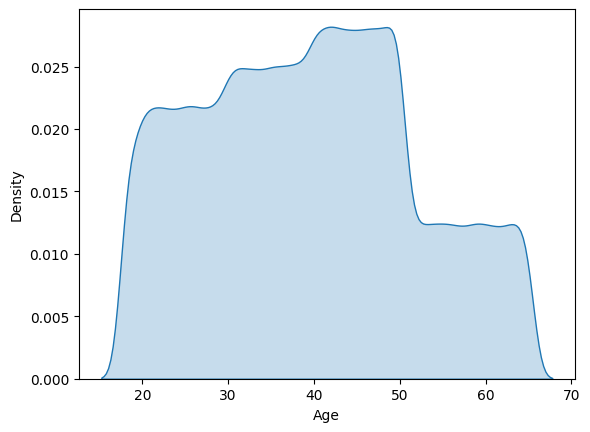

In [59]:
sns.kdeplot(df['Age'] , fill = True)

Checking Outliers

<Axes: ylabel='Age'>

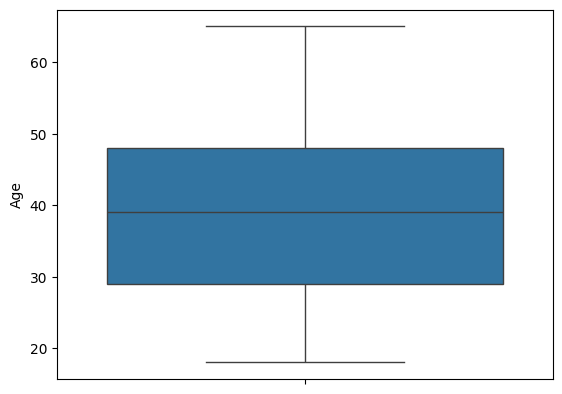

In [61]:
sns.boxplot(y= df['Age'])

In [62]:
# Using IQR Method

In [66]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

IQR = Q3 - Q1 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[((df['Age'] > upper_bound) | (df['Age'] < lower_bound))]

Empty DataFrame
Columns: [CustomerID, Age, Gender, Tenure, Usage Frequency, Support Calls, Payment Delay, Subscription Type, Contract Length, Total Spend, Last Interaction, Churn]
Index: []

In [69]:
def IQR(col : pd.Series) -> tuple[int,int]:
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [70]:
lb , ub = IQR(df['Age'])

In [71]:
df[((df['Age'] > ub) | (df['Age'] < lb))]

Empty DataFrame
Columns: [CustomerID, Age, Gender, Tenure, Usage Frequency, Support Calls, Payment Delay, Subscription Type, Contract Length, Total Spend, Last Interaction, Churn]
Index: []

In [78]:
df['Age'].median()

np.float64(39.0)

# Charachteristics About Age Column
1. It has Only 1 Missing Value (But all the values of other columns are also missing)
2. It has No Outliers
3. Mean and Median are approximately equal.(Hence Age is not Skewed)
4. Things to look :  

        min          18

        25%          29

        50%          39

        75%          48

        max          65


# Gender

In [80]:
df['Gender'].value_counts()

Gender
Male      250252
Female    190580
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

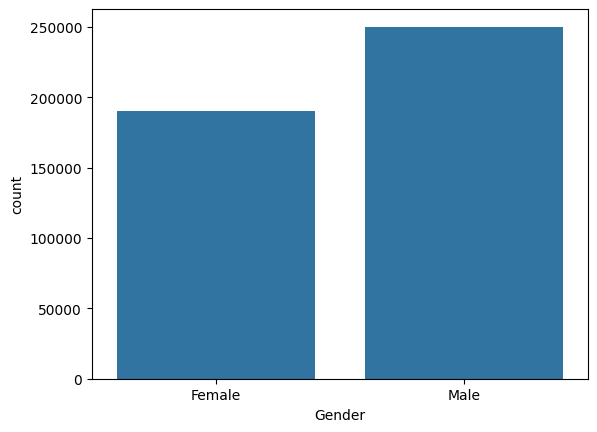

In [81]:
sns.countplot(x = df['Gender'])

In [87]:
Male_dist = df[df['Gender'] == 'Male'].shape[0] / df['Gender'].shape[0]
Female_dist = df[df['Gender'] == 'Female'].shape[0] / df['Gender'].shape[0]

In [90]:
print(Male_dist, Female_dist)

0.5676798243325704 0.4323179072347125


# Charachteristics About Gender Column

1. We only have 2 categories -> (M and F)
2. Males are around 57% 
3. Females are around 43%

# Tenure

In [92]:
df['Tenure'].describe()

count    440832.000000
mean         31.256336
std          17.255727
min           1.000000
25%          16.000000
50%          32.000000
75%          46.000000
max          60.000000
Name: Tenure, dtype: float64

In [93]:
df['Tenure'].median()

np.float64(32.0)

<Axes: xlabel='Tenure', ylabel='Count'>

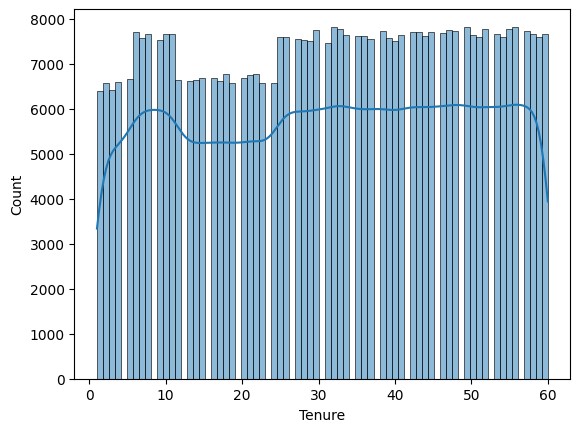

In [113]:
sns.histplot(df['Tenure'] , kde = True)

<Axes: ylabel='Tenure'>

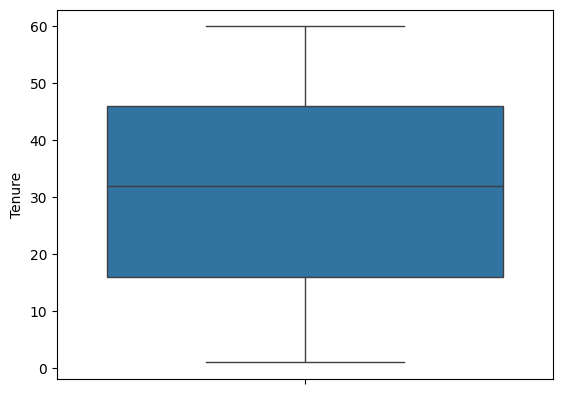

In [114]:
sns.boxplot(y = df['Tenure'])

In [116]:
lb , ub = IQR(df['Tenure'])

df[((df['Tenure'] > ub) | (df['Tenure'] < lb))]

Empty DataFrame
Columns: [CustomerID, Age, Gender, Tenure, Usage Frequency, Support Calls, Payment Delay, Subscription Type, Contract Length, Total Spend, Last Interaction, Churn]
Index: []

In [117]:
df['Tenure'].isnull().sum()

np.int64(1)

# Charachteristics About Tenure Column
1. There are no suspicious outliers
2. The data strong suggests that tenure is in Months
3. Only 1 Missing Value.
4. Mean and Median are same.

# Usage Frequency

In [119]:
df['Usage Frequency'].describe()

count    440832.000000
mean         15.807494
std           8.586242
min           1.000000
25%           9.000000
50%          16.000000
75%          23.000000
max          30.000000
Name: Usage Frequency, dtype: float64

In [120]:
lb , ub = IQR(df['Usage Frequency'])

df[((df['Usage Frequency'] > ub) | (df['Usage Frequency'] < lb))]

Empty DataFrame
Columns: [CustomerID, Age, Gender, Tenure, Usage Frequency, Support Calls, Payment Delay, Subscription Type, Contract Length, Total Spend, Last Interaction, Churn]
Index: []

<Axes: ylabel='Usage Frequency'>

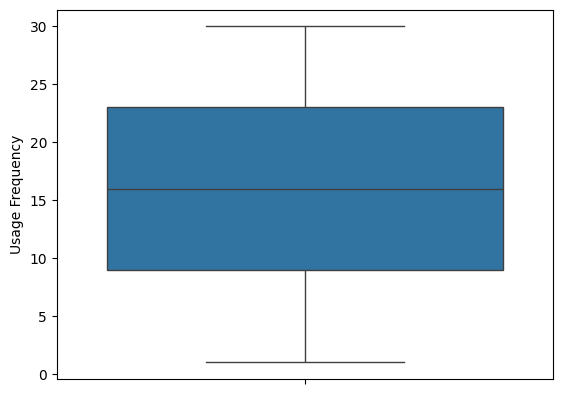

In [122]:
sns.boxplot(y=df['Usage Frequency'])

In [123]:
df['Usage Frequency'].median()

np.float64(16.0)

<Axes: xlabel='Usage Frequency', ylabel='Count'>

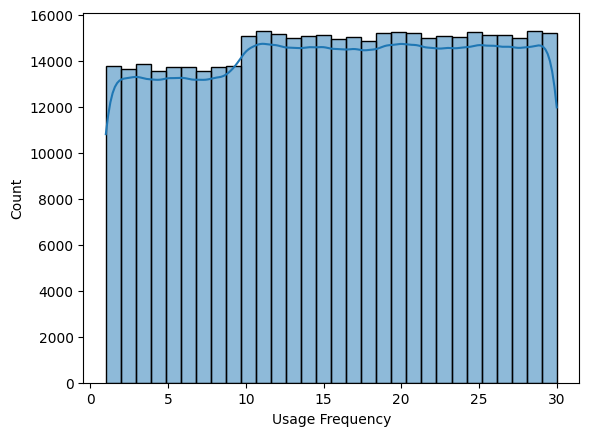

In [125]:
sns.histplot(x = df['Usage Frequency'], kde = True , bins = 30)

# Charachteristics of Usage Frequncy Column
1. There are no Outliers.
2. Mean and Median are almost equal
3. Usage Frequnecy Implies the Avg Activity of the User with Subscribly App on Per month.

# Support Calls

In [126]:
df['Support Calls'].describe()

count    440832.000000
mean          3.604437
std           3.070218
min           0.000000
25%           1.000000
50%           3.000000
75%           6.000000
max          10.000000
Name: Support Calls, dtype: float64

In [127]:
df['Support Calls'].median()

np.float64(3.0)

<Axes: ylabel='Support Calls'>

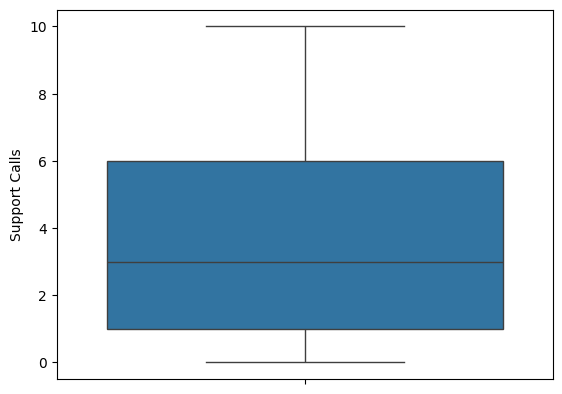

In [128]:
sns.boxplot(y=df['Support Calls'])

<Axes: xlabel='Support Calls', ylabel='Count'>

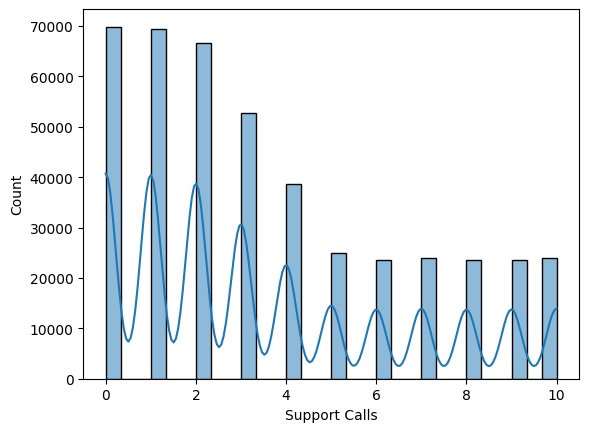

In [130]:
sns.histplot(x = df['Support Calls'], bins=30, kde=True)

In [134]:
df[df['Support Calls'] == 0][['Payment Delay' ,'Usage Frequency', 'Last Interaction',  'Churn']].sample(5)

Payment Delay  Usage Frequency  Last Interaction  Churn
255004            3.0             24.0              29.0    0.0
348098           13.0             12.0              15.0    0.0
363624           17.0             20.0              12.0    0.0
422710           19.0             29.0               4.0    0.0
119808           14.0             14.0              16.0    1.0

# Charachteristics of Support Calls Column
1. Mean and Meadian have no majot difference.
2. No Outliers in the data.
3. Customers are leaving even without support Calls

# Payment Delay

In [135]:
df['Payment Delay'].describe()

count    440832.000000
mean         12.965722
std           8.258063
min           0.000000
25%           6.000000
50%          12.000000
75%          19.000000
max          30.000000
Name: Payment Delay, dtype: float64

In [136]:
df['Payment Delay'].median()

np.float64(12.0)

<Axes: ylabel='Payment Delay'>

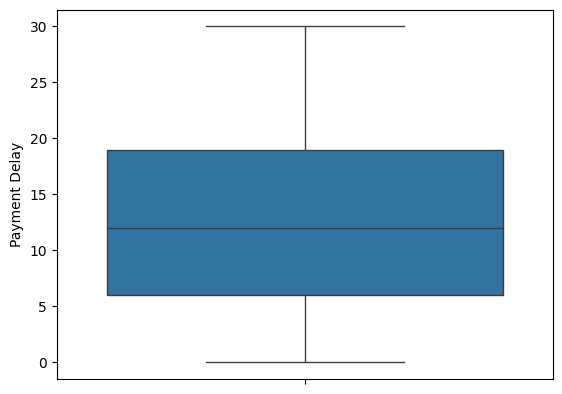

In [137]:
sns.boxplot(y = df['Payment Delay'])

In [138]:
lb , ub = IQR(df['Usage Frequency'])

df[((df['Usage Frequency'] > ub) | (df['Usage Frequency'] < lb))]

Empty DataFrame
Columns: [CustomerID, Age, Gender, Tenure, Usage Frequency, Support Calls, Payment Delay, Subscription Type, Contract Length, Total Spend, Last Interaction, Churn]
Index: []

In [139]:
df['Payment Delay'].isnull().sum()

np.int64(1)

<Axes: xlabel='Payment Delay', ylabel='Count'>

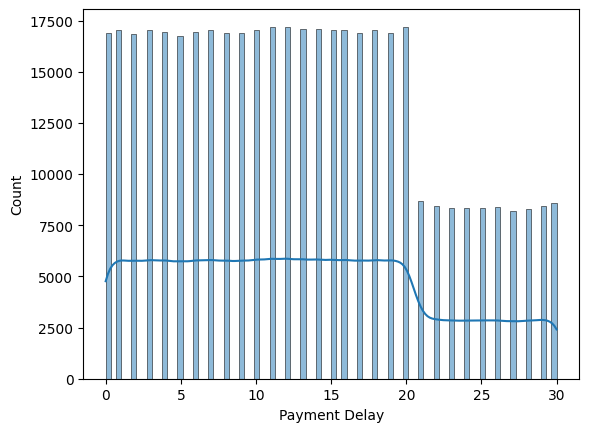

In [140]:
sns.histplot(x = df['Payment Delay'] , kde = True)

# Charachteristics About Payment Delay Column

1. Mean is 12.96, On an average customer takes 12.96 days to make the payment after past due dat.
2. most of the customers pay their due on time
3. No Outliers
4. Only 1 Missing values

# Subscription Type

In [141]:
df['Subscription Type'].value_counts()

Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64

<Axes: xlabel='Subscription Type', ylabel='count'>

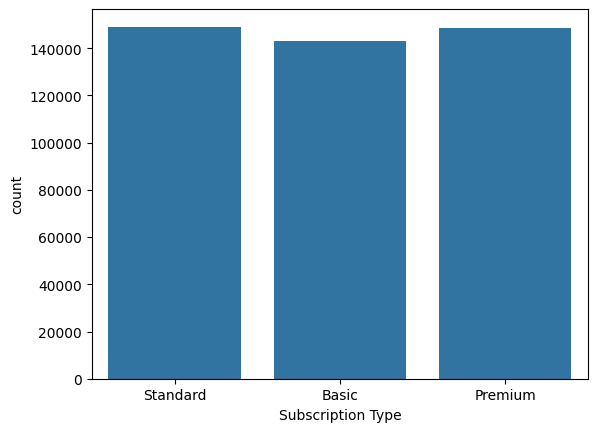

In [142]:
sns.countplot(x = df['Subscription Type'])

In [143]:
df['Subscription Type'].isnull().sum()

np.int64(1)

# Charachteristics About Subscription Type Column
1. The count of all the types are almost equal suggesting they all are qually balanced.
2. Only 1 Missing Value

# Contract Length

In [144]:
df['Contract Length'].value_counts()

Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64

<Axes: xlabel='Contract Length', ylabel='count'>

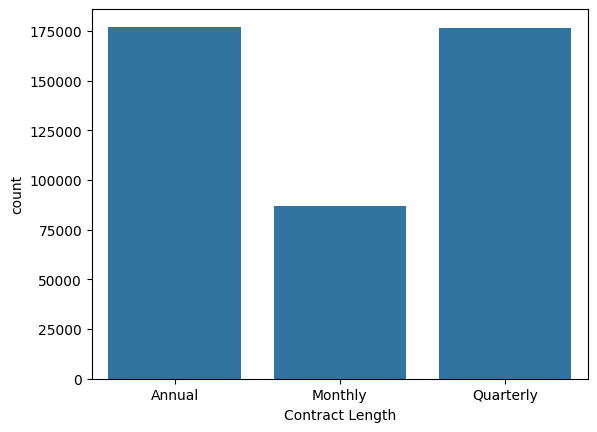

In [145]:
sns.countplot(x = df['Contract Length'])

# Charachteristics of Contract Length Column
1. Annual and Quarterly are the most popular plans with equal number of counts
2. People of Monthly Subscription are less suggesting that they may using this for seeing the services of Subscribly App.

# Total Spend

In [146]:
df['Total Spend'].describe()

count    440832.000000
mean        631.616223
std         240.803001
min         100.000000
25%         480.000000
50%         661.000000
75%         830.000000
max        1000.000000
Name: Total Spend, dtype: float64

In [148]:
df['Total Spend'].median()

np.float64(661.0)

<Axes: xlabel='Total Spend', ylabel='Count'>

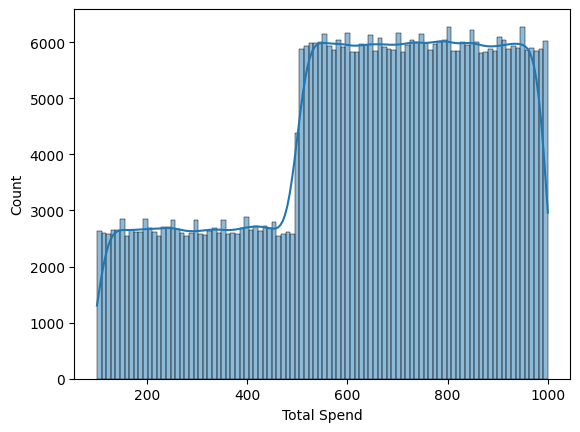

In [150]:
sns.histplot(x = df['Total Spend'], kde = True)

<Axes: ylabel='Total Spend'>

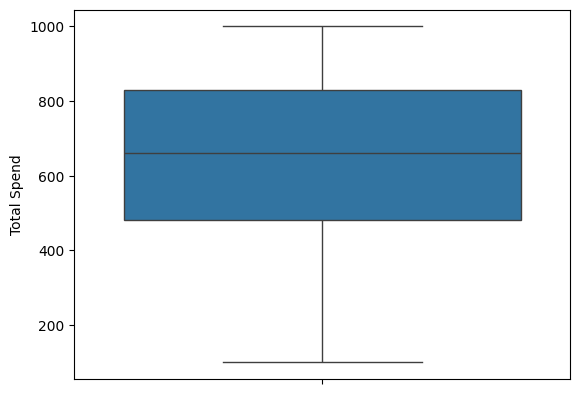

In [151]:
sns.boxplot(y = df['Total Spend'])

In [152]:
lb,ub = IQR(df['Total Spend'])

df[((df['Total Spend'] > ub) | (df['Total Spend'] < lb))]

Empty DataFrame
Columns: [CustomerID, Age, Gender, Tenure, Usage Frequency, Support Calls, Payment Delay, Subscription Type, Contract Length, Total Spend, Last Interaction, Churn]
Index: []

# Charachteristics of Total Spend Column
1. There are no Outliers
2. On an average people spend 632 units of their currency
3. Median is higher than mean -> Suggesting Left Skewed Data
4. There are 2 categories of customers the first category pays between 100 to 450 and then ther is a sudden spike in the price suggesting Premium Plans Customers

# Last Interaction

In [154]:
df['Last Interaction'].describe()

count    440832.000000
mean         14.480868
std           8.596208
min           1.000000
25%           7.000000
50%          14.000000
75%          22.000000
max          30.000000
Name: Last Interaction, dtype: float64

In [155]:
df['Last Interaction'].median()

np.float64(14.0)

<Axes: xlabel='Last Interaction'>

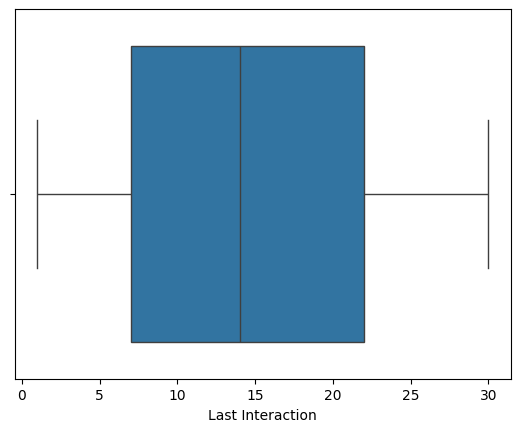

In [156]:
sns.boxplot(x=df['Last Interaction'])

<Axes: xlabel='Last Interaction', ylabel='Count'>

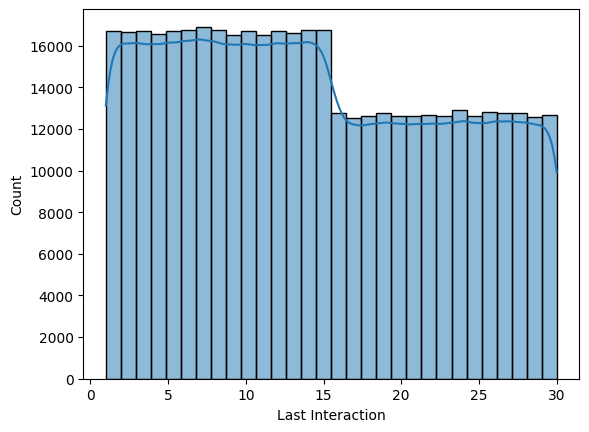

In [157]:
sns.histplot(data=df, x='Last Interaction', bins=30, kde=True)

In [160]:
df[df['Last Interaction'] == 30]['Churn'].value_counts()

Churn
1.0    8429
0.0    4225
Name: count, dtype: int64

# Charachteristics About Last Interaction
1. Min days is 1 day.
2. Max days are 30.
3. For maximum Last interaction days majority of customers left (Strong Dependence on Churning)
4. No Outlliers

# Churn (Imp)

In [162]:
df['Churn'].value_counts() 

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1d4eae9ba90>,
 [Text(-0.23019184693674813, 1.0756447896977184, 'Churn'),
  Text(0.23019181274575462, -1.0756447970147134, 'No Churn')],
 [Text(-0.12555918923822623, 0.586715339835119, '56.7%'),
  Text(0.12555917058859342, -0.5867153438262072, '43.3%')])

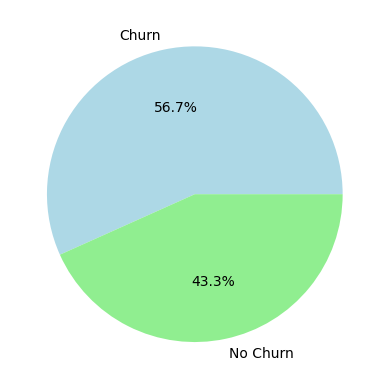

In [170]:
plt.pie(df['Churn'].value_counts() , autopct='%1.1f%%', labels = ['Churn' , 'No Churn'] , colors = ['lightblue' , 'lightgreen'])

<Axes: xlabel='Churn', ylabel='count'>

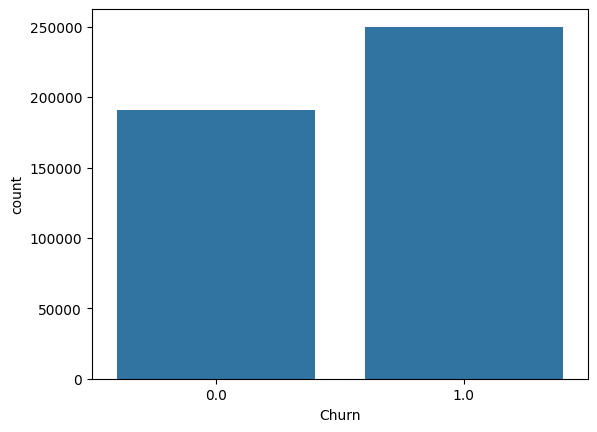

In [169]:
sns.countplot(x = df['Churn'])

# Charachteristics of Churn Column
1. Churned Customers are 57 %
2. Retained Custoemers are 43%
3. It shows that people are leaving the Subscribly app.

# Multivariate Analysis

# Customer ID

In [171]:
df['CustomerID'].corr(df['Churn'])

np.float64(-0.8393651488367958)

In [176]:
df.shape

(440833, 12)

In [175]:
df.groupby("CustomerID")["Churn"].nunique().value_counts()

Churn
1    440832
Name: count, dtype: int64

# Points to Ponder
1. Need to Drop this column as the main purpose of the column is to uniquely identify a target.

# Age

In [187]:
df.select_dtypes(include= object)

Gender Subscription Type Contract Length
0       Female          Standard          Annual
1       Female             Basic         Monthly
2       Female             Basic       Quarterly
3         Male          Standard         Monthly
4         Male             Basic         Monthly
...        ...               ...             ...
440828    Male           Premium          Annual
440829  Female           Premium          Annual
440830    Male          Standard       Quarterly
440831    Male          Standard       Quarterly
440832    Male           Premium       Quarterly

[440833 rows x 3 columns]

In [192]:
num_cols = df.select_dtypes(include = np.number).columns.tolist()

In [206]:
num_cols.remove('Churn')

In [193]:
cat_cols = df.select_dtypes(include = object).columns.tolist()

In [198]:
def scatter(target : 'str' , cols : list):
    for col in cols :
        sns.scatterplot(x = df[target] , y = df[col], hue = df['Churn'])
        plt.show()


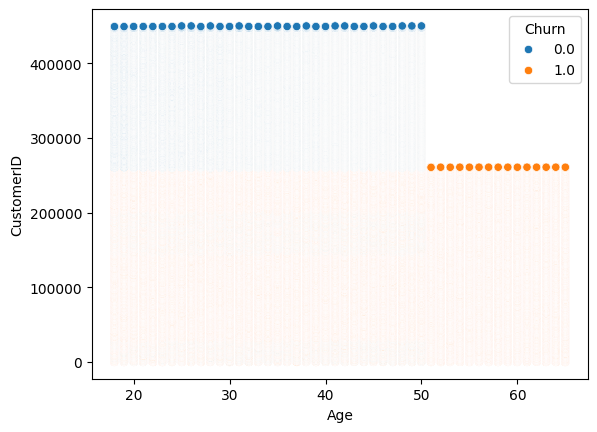

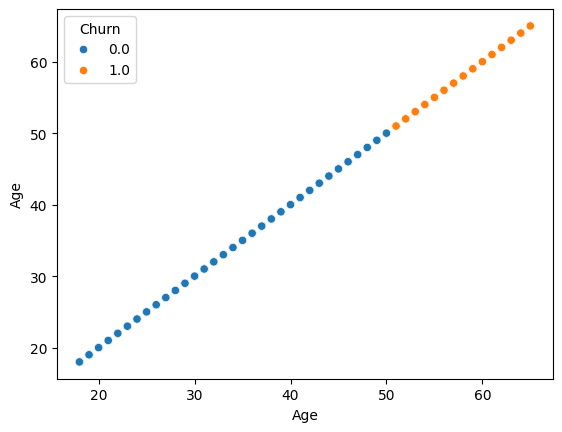

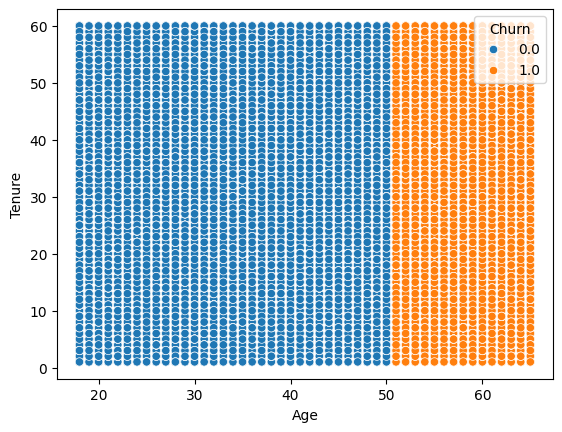

c:\Users\avanindra Bose\Customer Churn\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


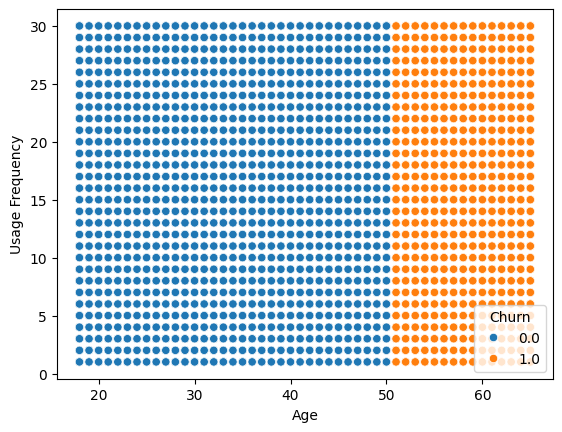

c:\Users\avanindra Bose\Customer Churn\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


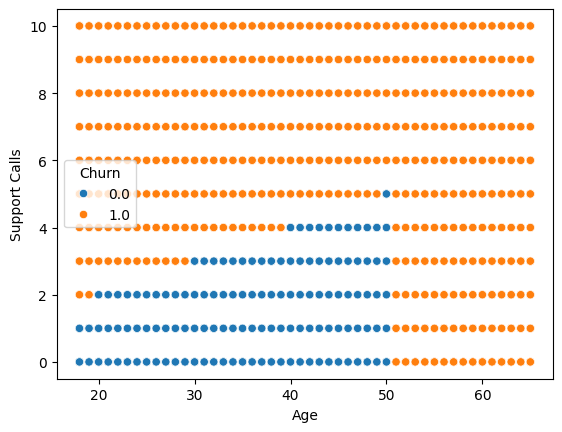

c:\Users\avanindra Bose\Customer Churn\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


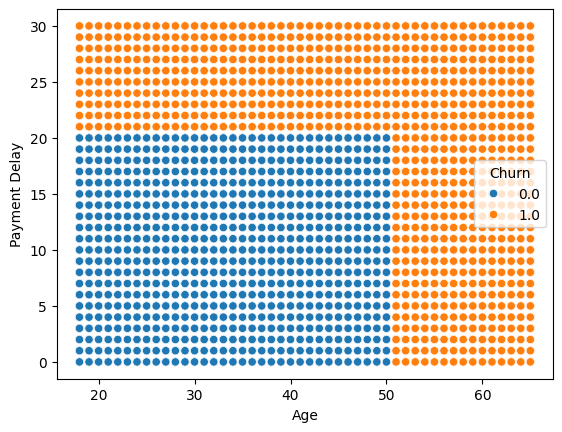

c:\Users\avanindra Bose\Customer Churn\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


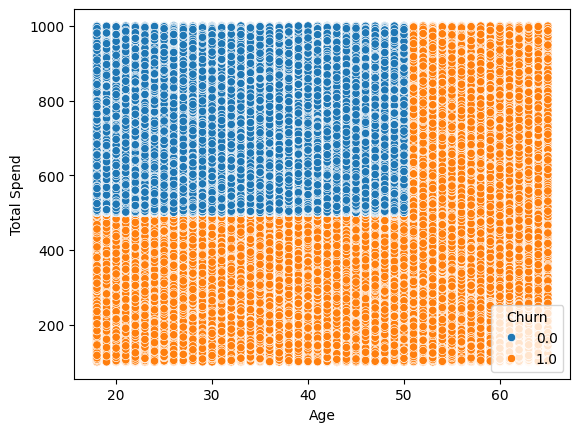

c:\Users\avanindra Bose\Customer Churn\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


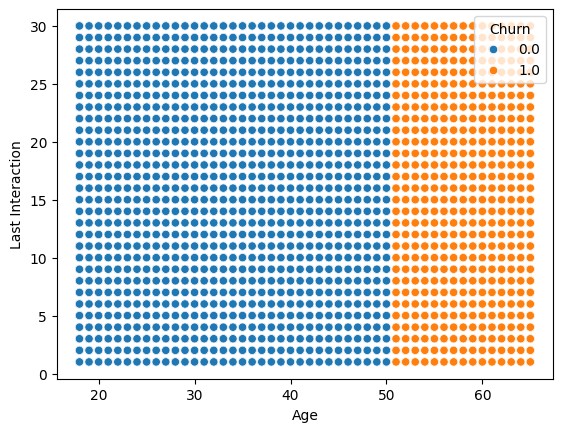

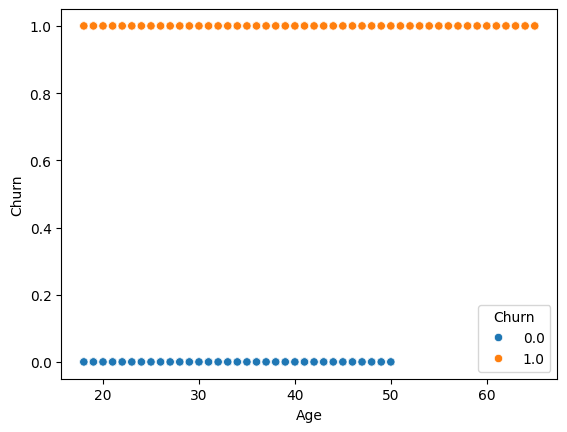

In [199]:
scatter('Age',num_cols)

<Axes: xlabel='Age', ylabel='Probability'>

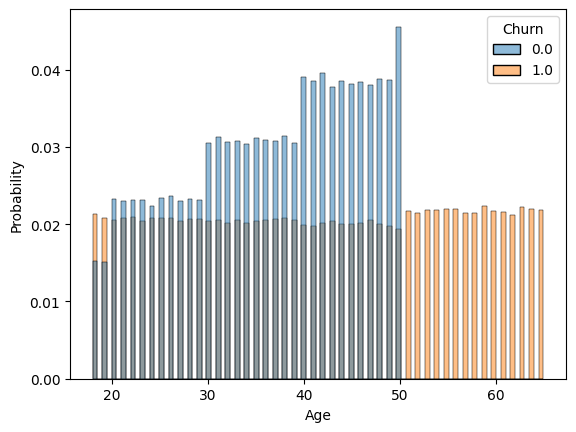

In [218]:
sns.histplot(x = df['Age'] , hue = df['Churn'] , stat="probability",
    common_norm=False)

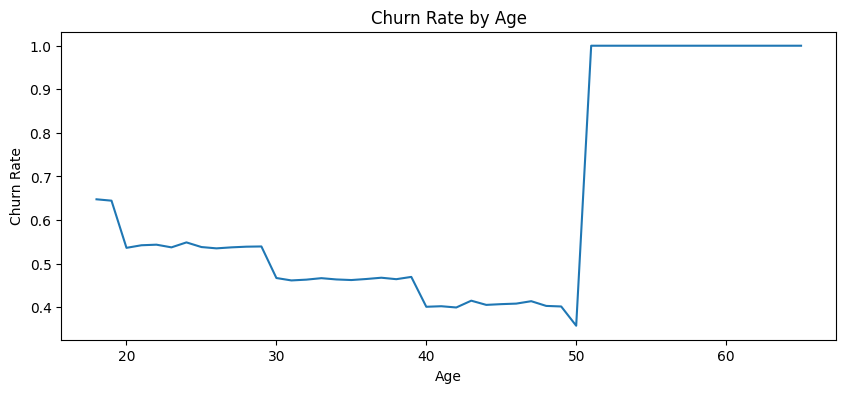

In [226]:
age_churn = df.groupby("Age")["Churn"].mean()

plt.figure(figsize=(10, 4))
plt.plot(age_churn.index, age_churn.values)
plt.xlabel("Age")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Age")
plt.show()


In [223]:
df[df['Age'] >= 50].shape[0] / df.shape[0]

0.21591169445118674

In [224]:
df[df['Age'] < 50].shape[0] / df.shape[0]

0.7840860371160961

One Imp Observation is that the number of people in age < 50 is more than the number of people in the age >= 50 hence we are seeing the spike in the graph and the people which is greater than 50 are leaving

In [231]:
df["age_bucket"] = pd.cut(
    df["Age"],
    bins=[18, 25, 35, 45, 55, 70],
    right=False
)

age_churn_ = df.groupby("age_bucket")["Churn"].mean()

C:\Users\avanindra Bose\AppData\Local\Temp\ipykernel_22584\105943303.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn_ = df.groupby("age_bucket")["Churn"].mean()


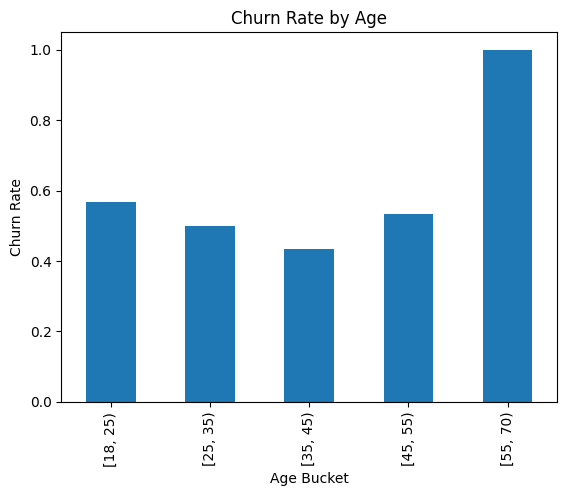

In [235]:
age_churn_.plot(kind = "bar")
plt.xlabel("Age Bucket")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Age")
plt.show()

<Axes: xlabel='Churn', ylabel='Age'>

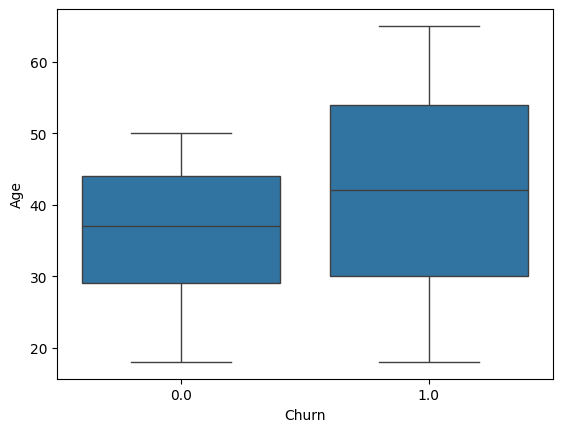

In [204]:
sns.boxplot(x="Churn", y="Age", data=df)

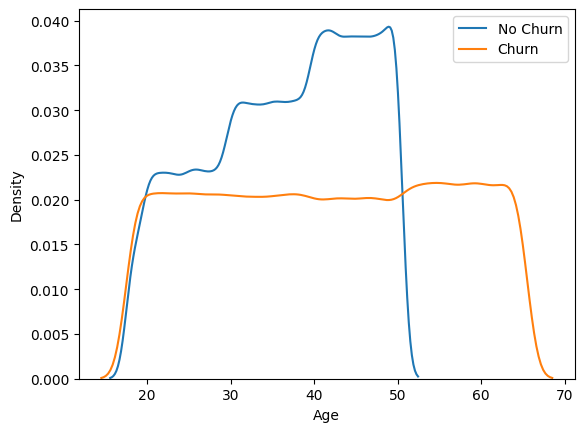

In [208]:
sns.kdeplot(df[df["Churn"] == 0]["Age"], label="No Churn")
sns.kdeplot(df[df["Churn"] == 1]["Age"], label="Churn")
plt.legend()

In [209]:
cat_cols

['Gender', 'Subscription Type', 'Contract Length']

C:\Users\avanindra Bose\AppData\Local\Temp\ipykernel_22584\2271440513.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_bucket' , 'Subscription Type'])['Churn'].mean().plot(kind = "bar")


<Axes: xlabel='age_bucket,Subscription Type'>

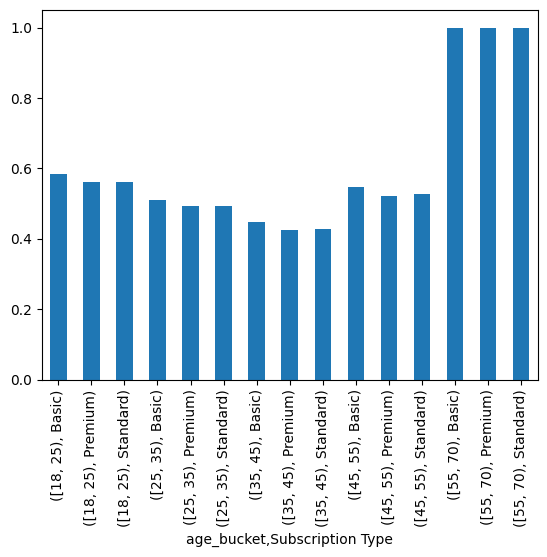

In [240]:
df.groupby(['age_bucket' , 'Subscription Type'])['Churn'].mean().plot(kind = "bar")

C:\Users\avanindra Bose\AppData\Local\Temp\ipykernel_22584\1745747641.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_bucket')['Total Spend'].sum().plot(kind = 'bar')


<Axes: xlabel='age_bucket'>

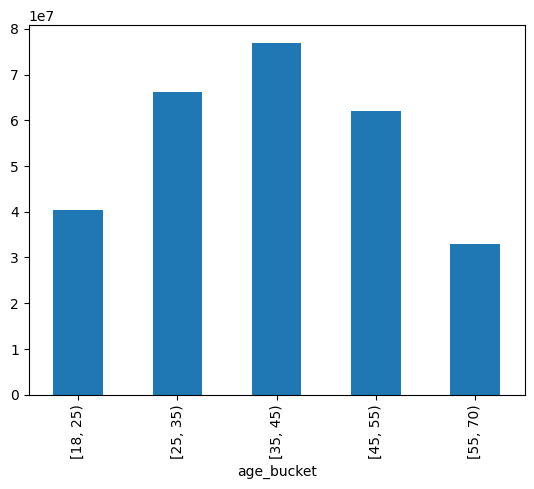

In [245]:
df.groupby('age_bucket')['Total Spend'].sum().plot(kind = 'bar')

C:\Users\avanindra Bose\AppData\Local\Temp\ipykernel_22584\4240691481.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_bucket' , 'Contract Length'])['Churn'].sum().plot(kind = 'bar')


<Axes: xlabel='age_bucket,Contract Length'>

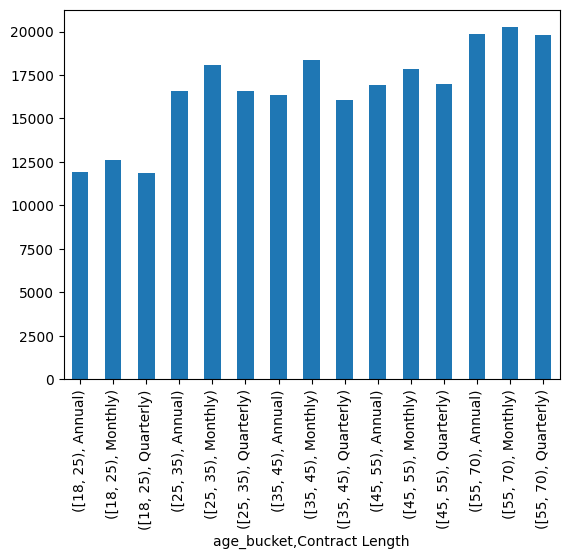

In [246]:
df.groupby(['age_bucket' , 'Contract Length'])['Churn'].sum().plot(kind = 'bar')

Few things to Note : 
1. Age shows a non-linear relationship with churn. Churn risk decreases from young adulthood to mid-life, then increases again. Extreme age buckets suffer from low sample size, so age was bucketed into coarse groups to stabilize churn estimates. There is a U-shaped Pattern that we can observe here.
2. Age Bucket 35 to 45 spend the most and they churn the less.

# Usage Frequency

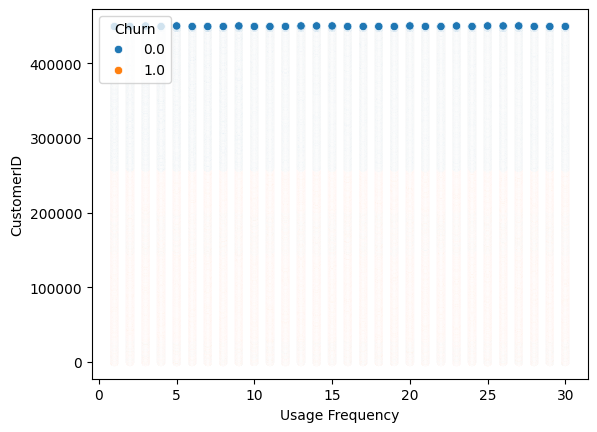

c:\Users\avanindra Bose\Customer Churn\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


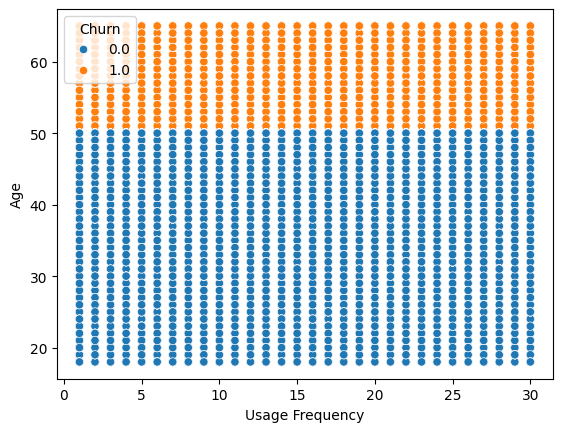

c:\Users\avanindra Bose\Customer Churn\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


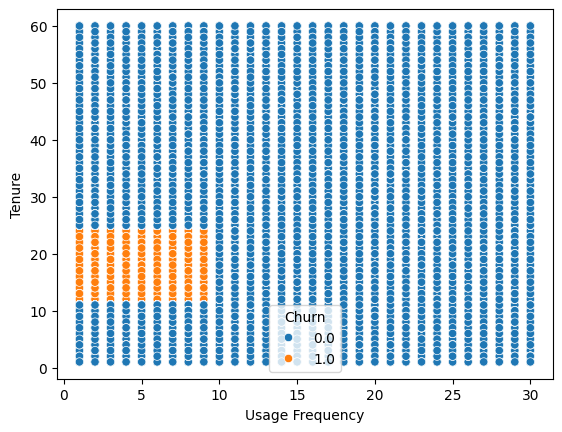

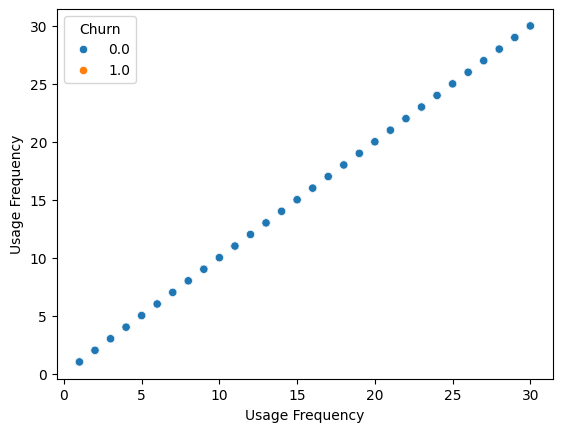

c:\Users\avanindra Bose\Customer Churn\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


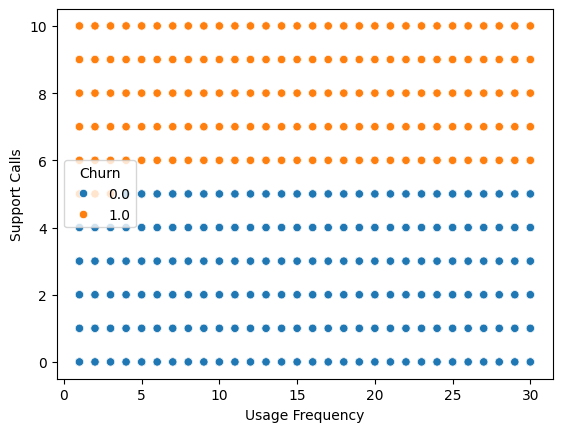

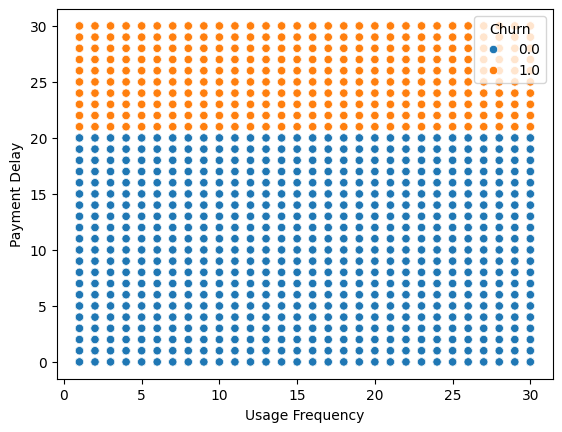

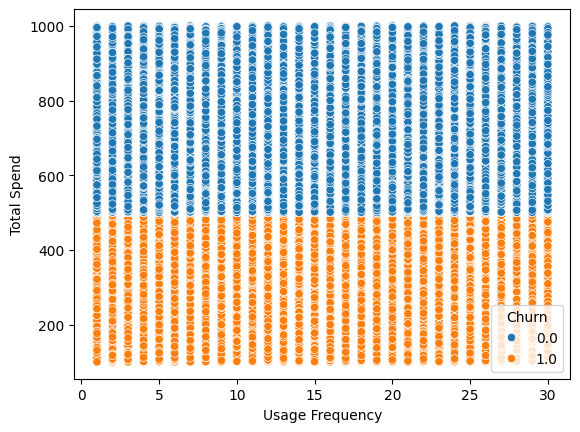

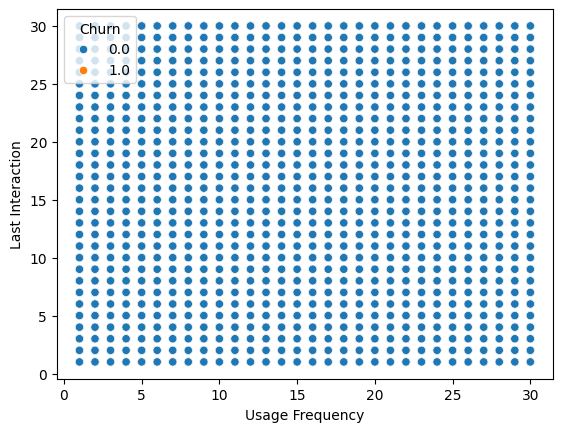

In [247]:
scatter('Usage Frequency',num_cols)

<Axes: >

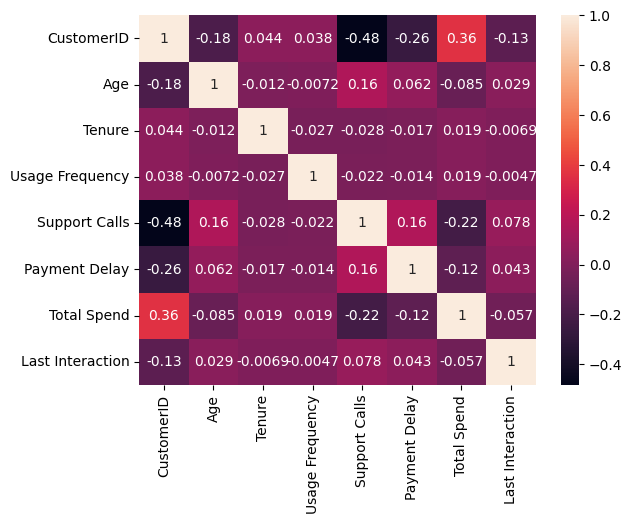

In [251]:
corr = df[num_cols].corr()
sns.heatmap(corr , annot = True)

Text(0, 0.5, 'Churn Rate')

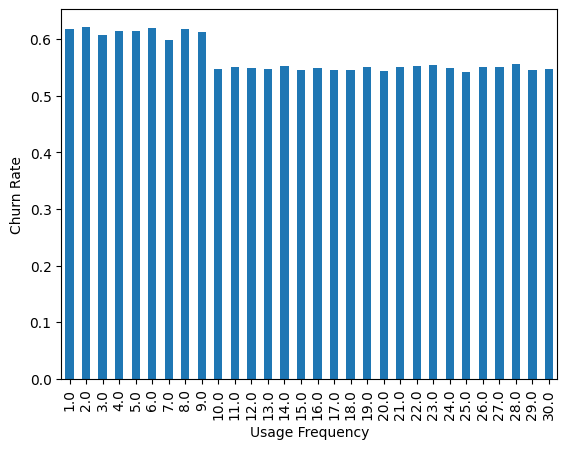

In [254]:
df.groupby('Usage Frequency')["Churn"].mean().plot(kind = 'bar')
plt.ylabel("Churn Rate")

Points to Note : 
Churn rate shows a mild decreasing tendency with higher usage frequency, but the relationship is weak and relatively flat, indicating limited standalone predictive power.

# Tenure

<Axes: xlabel='Tenure'>

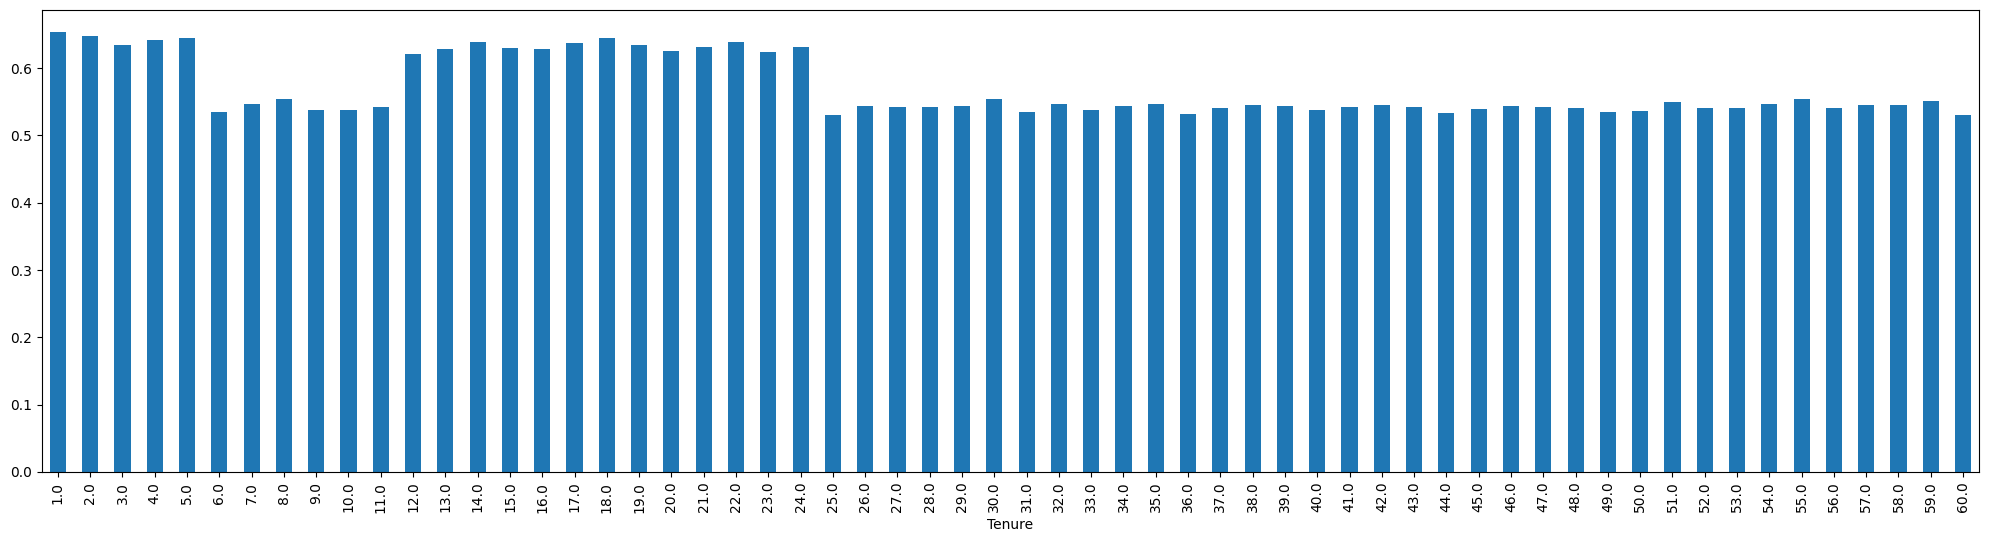

In [264]:
plt.figure(figsize=(25,6))
df.groupby('Tenure')["Churn"].mean().plot(kind = "bar")

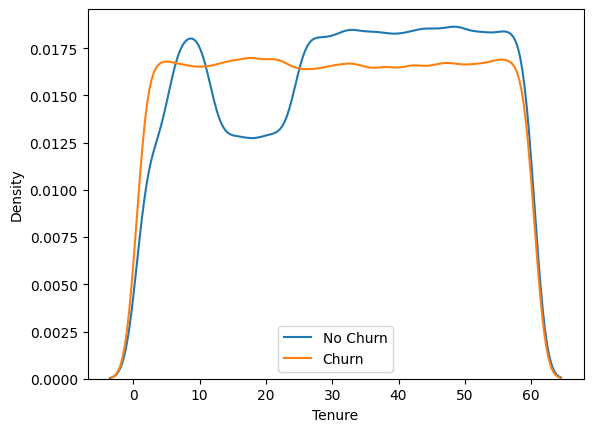

In [267]:
sns.kdeplot(df[df["Churn"] == 0]["Tenure"], label="No Churn")
sns.kdeplot(df[df["Churn"] == 1]["Tenure"], label="Churn")
plt.legend()

<Axes: xlabel='Churn', ylabel='Tenure'>

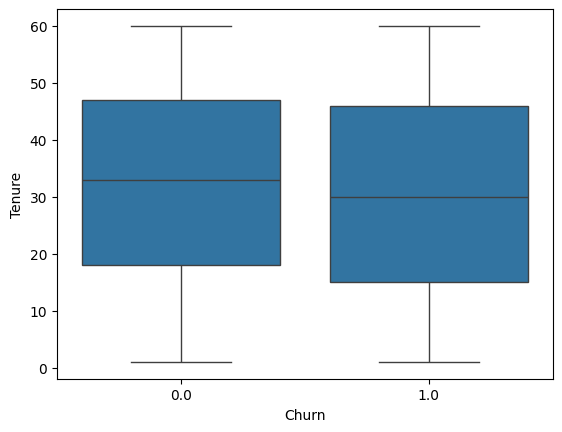

In [282]:
sns.boxplot(y = df['Tenure'] , x = df['Churn'])

Points to Note : 
Insight 1: Strong Overlap (Very Important)

The blue and orange curves overlap heavily across almost the entire tenure range.

This tells you:

Tenure alone does not perfectly separate churned and non-churned users.

That is normal and expected in real churn problems.

Insight 2: Early Tenure Region (Critical)

Look at the left side (low tenure, ~0–10):

Orange (Churn) density is slightly higher

Blue (No Churn) density is lower

Interpretation:

Customers who churn are more likely to have short tenure.

This is a strong and very common churn pattern:

early-stage customers are more fragile

long-term customers are more stable

Insight 3: Mid-to-High Tenure Region

From roughly 15 onward:

Blue density dominates slightly

Orange curve flattens and stays lower

Interpretation:

Long-tenure customers are more likely to stay than churn.

This reinforces:

tenure is a protective feature

retention increases with time

Insight 4: Flatness at High Tenure (Subtle but Important)

At higher tenure values, both curves flatten and then drop.

This suggests:

a natural maximum tenure in the dataset

fewer users at extreme tenure

no strange long-tail behavior

This is a data-quality positive sign.

# Support Calls

Text(0, 0.5, 'Churn Rate')

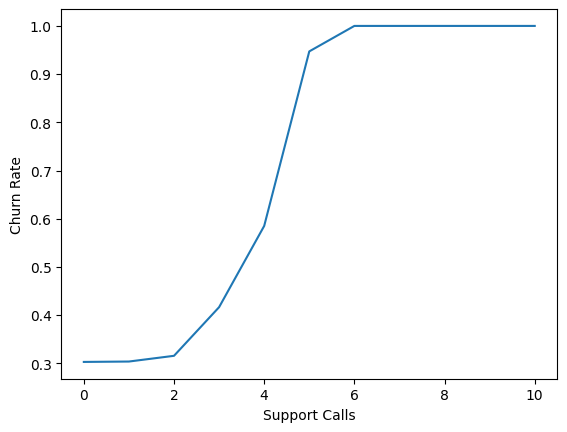

In [285]:
 df.groupby('Support Calls')["Churn"].mean().plot(kind = 'line')
 plt.ylabel("Churn Rate")

<Axes: xlabel='Churn', ylabel='Support Calls'>

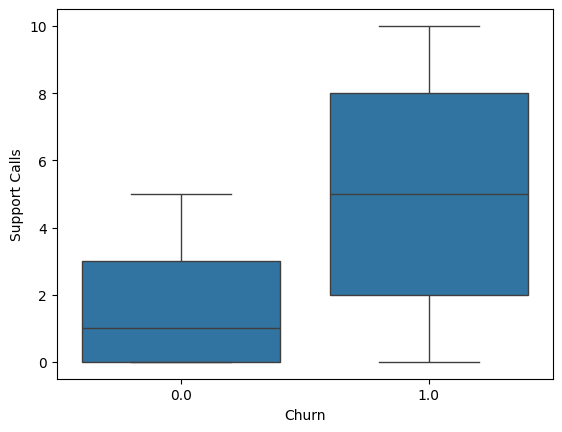

In [286]:
sns.boxplot(x = df['Churn'] , y = df['Support Calls'])

Points to Note : 
Its a clear indication that more the number of support calls more the Churn Rate.

In [287]:
num_cols

['CustomerID',
 'Age',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Total Spend',
 'Last Interaction']

# Payment Delay

<Axes: xlabel='Payment Delay'>

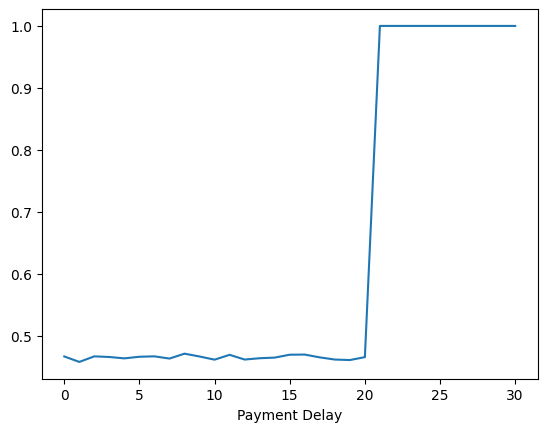

In [288]:
df.groupby('Payment Delay')["Churn"].mean().plot(kind = 'line')

<Axes: xlabel='Churn', ylabel='Payment Delay'>

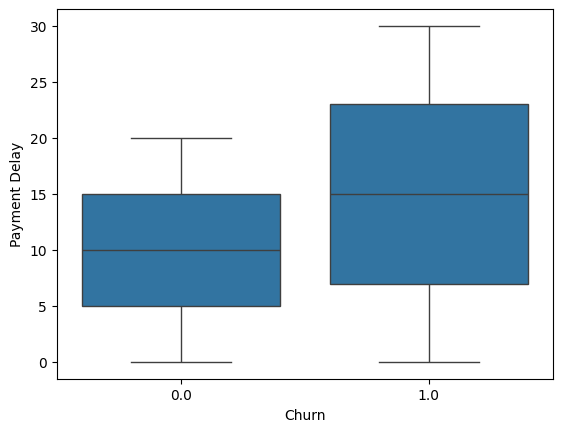

In [289]:
sns.boxplot(y = df['Payment Delay'] , x = df['Churn'])

In [293]:
# Subscription having highest Payment Delay
df.groupby(['Subscription Type', 'Contract Length'])['Payment Delay'].mean()

Subscription Type  Contract Length
Basic              Annual             12.502066
                   Monthly            15.063580
                   Quarterly          12.512107
Premium            Annual             12.477352
                   Monthly            14.905673
                   Quarterly          12.389405
Standard           Annual             12.417662
                   Monthly            15.052510
                   Quarterly          12.483735
Name: Payment Delay, dtype: float64

In [294]:
df.groupby('Contract Length')['Payment Delay'].mean()

Contract Length
Annual       12.465135
Monthly      15.007198
Quarterly    12.460891
Name: Payment Delay, dtype: float64

Points to Note : 
When Payment Delay is greater than 15 , Then Churn Rate Shoots Up.
Monthly Subscription is Having highest Number of Payment Delay , Getting the hint that Monthly Subscription People may churn easily.

# Last Interaction

<Axes: xlabel='Last Interaction'>

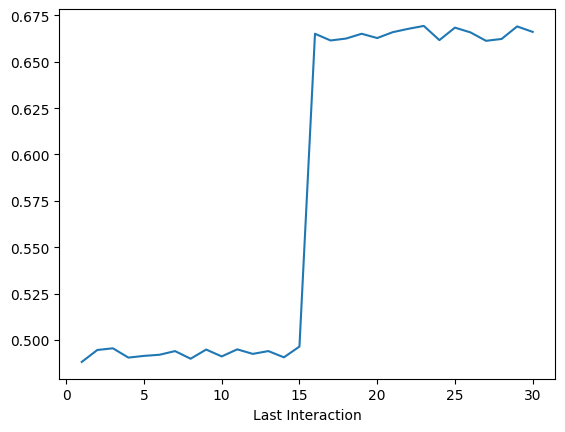

In [296]:
df.groupby('Last Interaction')['Churn'].mean().plot(kind = 'line')

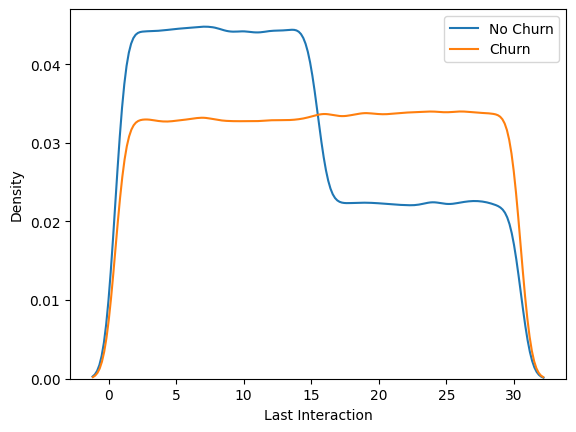

In [300]:
sns.kdeplot(x = df[df['Churn'] == 0]['Last Interaction'] , label = "No Churn")
sns.kdeplot(x = df[df['Churn'] == 1]['Last Interaction'] , label = "Churn")
plt.legend()

Insight 1: Recency Is a Strong Churn Driver

This plot is telling you:

Customers who haven’t interacted recently are significantly more likely to churn.

The jump is:

abrupt

large (~17 percentage points)

stable across higher values

That combination is rare and extremely valuable.

Insight 2: The Threshold Matters More Than the Exact Value

Notice:

churn rate is flat within each region

the exact value of Last Interaction beyond 16 doesn’t change risk much

So the feature behaves like:

low-risk zone (recent interaction)

high-risk zone (stale interaction)

This is a binary-style signal hidden inside a numeric feature.

# Total Spend

In [303]:
df['Total Spend'].describe()

count    440832.000000
mean        631.616223
std         240.803001
min         100.000000
25%         480.000000
50%         661.000000
75%         830.000000
max        1000.000000
Name: Total Spend, dtype: float64

In [305]:
df['Total Spend Buckt'] = pd.cut(
    df['Total Spend'],
    bins = [100,200,300,400,500,600,700,800,900,1000]
)

C:\Users\avanindra Bose\AppData\Local\Temp\ipykernel_22584\2348506331.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Total Spend Buckt')['Churn'].mean().plot(kind = 'line')


<Axes: xlabel='Total Spend Buckt'>

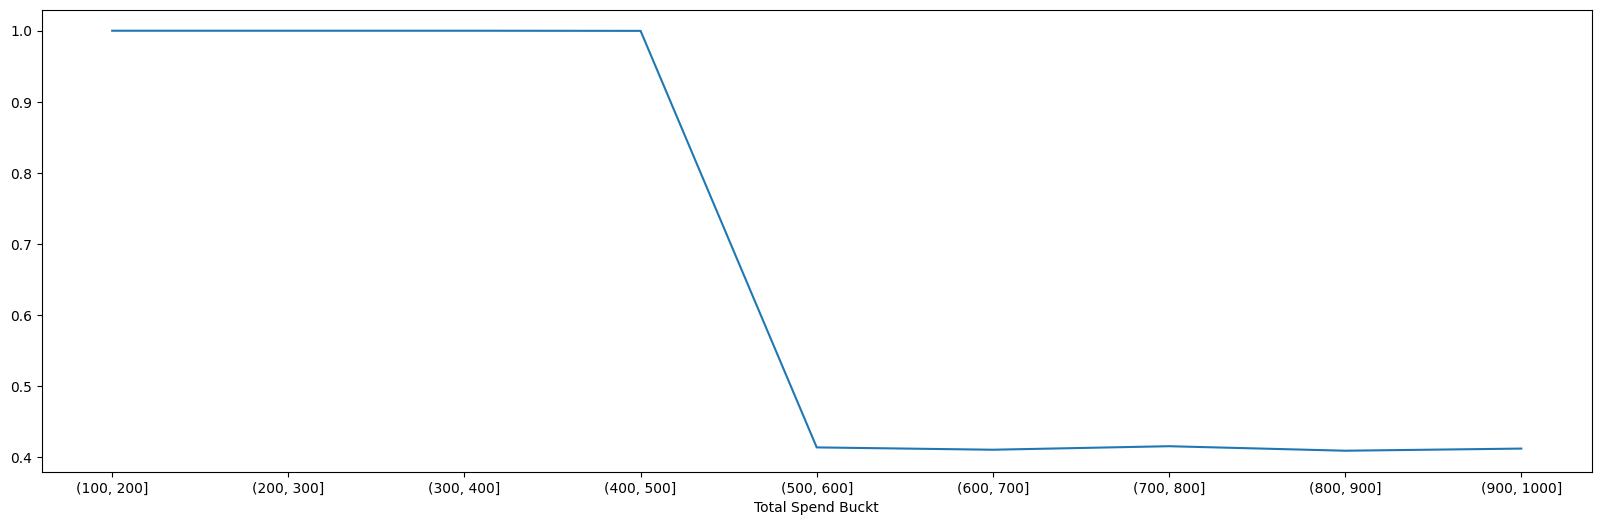

In [308]:
plt.figure(figsize=(20,6))
df.groupby('Total Spend Buckt')['Churn'].mean().plot(kind = 'line')

Points to Note : 
Clear Indication that Churn Rate Decreases After Increasing the Total Spend

# Gender

In [310]:
df['Gender'].value_counts(normalize = True)

Gender
Male      0.567681
Female    0.432319
Name: proportion, dtype: float64

In [311]:
df.groupby("Gender")["Churn"].mean().sort_values()

Gender
Male      0.491269
Female    0.666691
Name: Churn, dtype: float64

In [312]:
pd.concat(
    [
        df["Gender"].value_counts(),
        df.groupby("Gender")["Churn"].mean()
    ],
    axis=1,
    keys=["count", "churn_rate"]
)


count  churn_rate
Gender                    
Male    250252    0.491269
Female  190580    0.666691

In [315]:
pd.crosstab(df["Gender"], df["Churn"] , normalize = "index")

Churn        0.0       1.0
Gender                    
Female  0.333309  0.666691
Male    0.508731  0.491269

Points to Note : Though It is not posing any cause of concern , but It can be seen that female tend to churn more.

# Subscription Type and Contract Length

In [317]:
pd.crosstab(df['Subscription Type'] , df['Churn'] , normalize = 'index')

Churn                   0.0       1.0
Subscription Type                    
Basic              0.418218  0.581782
Premium            0.440583  0.559417
Standard           0.439300  0.560700

In [321]:
df.groupby(['Subscription Type','Contract Length'])['Churn'].mean()

Subscription Type  Contract Length
Basic              Annual             0.474501
                   Monthly            1.000000
                   Quarterly          0.475884
Premium            Annual             0.453918
                   Monthly            1.000000
                   Quarterly          0.450762
Standard           Annual             0.454453
                   Monthly            1.000000
                   Quarterly          0.454979
Name: Churn, dtype: float64

In [327]:
df[(df['Subscription Type'].isin(['Basic','Premium' , 'Standard'])) & (df['Contract Length']== 'Monthly')]['Churn'].value_counts()

Churn
1.0    87104
Name: count, dtype: int64

In [330]:
df[df['Contract Length'] == 'Monthly']['Churn'].value_counts(normalize = True)

Churn
1.0    1.0
Name: proportion, dtype: float64

Points To Note : 
1. The highest Churn Can be seen in Basic Subscription Plan.
2. All the Monthly Subscription Plans are Churned. That's Huge.